# 1. Contrast (대비 or 명암)
- 'Contrast' is the difference in luminance or colour that makes an object (or its representation in an image or display) distinguishable. ㅡ *Wikipedia*
- 'Contrast'는 물체를 식별할 수 있도록 하는 휘도(luminance) 또는 색(colour)의 차이이다.

<br>
<img src='rc/contrast.jpg' alt='contrast' width="1920" heigh="1080">  

<br>

# 2. Dynamic range (동적 범위)
- 이미지의 maximum contrast를 dynamic range라고 함
- 카메라는 재현할 수 있는 수 있는 dynamic range에 한계가 있음
- 명암의 대비가 큰 장면을 사람이 눈으로 볼 때와 사진으로 볼 때 차이가 존재함

<br>
<img src='rc/dynamic_range.jpg' alt='dynamic range' width="1920" heigh="1080">

<br>  

# 3. Low contrast vs. High contrast
<img src='rc/low_high_contrast.png' alt='contrast' width="1920" heigh="1080">  

<br>  

- Low contrast
  - contrast가 낮은 이미지는 이미지 내 물체 간 구분력을 떨어뜨림
  - 원인: 조명 부족, 이미징 센서의 동적 범위 부족, 잘못된 렌즈 조리개 설정 등
 
<br>

# ※ HDR (High Dynamic Range)
- 순간적으로 노출이 다른 장면을 촬영하여 밝은 곳과 어두운 곳이 모두 잘 보이게끔 합성하는 이미지 후처리 방식

<br>
<img src='rc/hdr.jpg' alt='hdr' width="1920" heigh="1080">

<br>

### \[reference]
  - [link #1 - contrast](https://theailearner.com/2019/01/30/what-is-contrast-in-image-processing/)
  - [link #2 - dynamic range](http://news.samsungdisplay.com/14820)  
  &#128525;[](https://steemit.com/steemkr-guide/@snow-airline/steemkr-quick-start-guide)

# 4. Practice
## 1) Check contrast

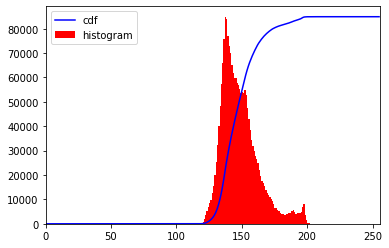

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg') # cv2.IMREAD_COLOR (default) / cv2.IMREAD_GRAYSCALE / cv2.IMREAD_UNCHANGED
# img = cv2.imread('lung.jpg')

# 히스토그램 생성하기
hist, bins = np.histogram(img, 256, [0,256])
#0-256사이의 값을 256단계로 나눔
#hist: 히스토그램의 y축 값, 밝기값마다의 빈도수
#bins: 히스토그램의 x축 값, 0-256 밝기값

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max() # 정규화 해주는 이유 => 히스토그램과 같은 스케일로 표현하기 위함    


# 히스토그램 시각화하기
#plt.plot(cdf, color='g')
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')  #빨간색, 파란색이 무엇인지 보여줄 때
plt.show()  


# 이미지 창 띄우기
#cv2.imshow('image', img)  #창 이름, 띄울 이미지 파일명
#cv2.waitKey()  #사용자가 키를 누를 때까지 기다림

#cv2.destroyAllWindows() 


## 2) Min-max stretching

- 가장 작은 값을 0, 가장 큰 값이 255가 되도록 매핑시킴

\begin{align}
X_{new} = \frac{X_{input} - X_{min}}{X_{max} - X_{min}} \times 255
\end{align}

112
211


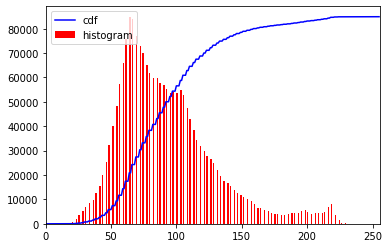

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg')

# min-max stretching 수행하기
hist, bins = np.histogram(img, 256, [0,256])
print(img.min())
print(img.max())

img_minmax = (img - img.min()) / (img.max() - img.min()) * 255.0
img_minmax = img_minmax.astype(np.uint8)

# 히스토그램 생성하기
hist, bins = np.histogram(img_minmax, 256, [0,256])

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# 히스토그램 시각화하기
plt.plot(cdf_normalized, color='b')
plt.hist(img_minmax.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')
plt.show()

# 이미지 창 띄우기
cv2.imshow('image', img_minmax)
cv2.waitKey()

cv2.destroyAllWindows()

## 3) Percentile stretching

lowpx:  128
highpx:  187


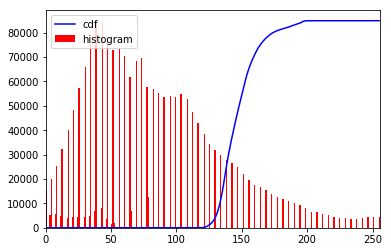

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def percentile_stretching(img, p_low, p_high):
    '''
    percentile stretching 함수
    
    Parameters
    ----------
    p_low: int (0~100)
        percentile stretching을 수행하기 위한 하위 백분율
    p_high: int (0~100)
        percentile stretching을 수행하기 위한 상위 백분율
    
    Returns
    -------
    img_ptile: array
        percentile stretching 처리된 이미지 배열
    
    '''
    img = cv2.imread('landscape.jpg')
    hist, bins = np.histogram(img, 256, [0,256])
    cdf = hist.cumsum()    
    
    num1=0
    num2=0
    for i in range (0,256):
        num1+=np.array(hist[i])
        if num1> (hist.sum()*p_low*0.01):
            #print("num1: ", num1)
            #print("low: ", i)
            break
    for j in range (255,-1, -1):
        num2+=np.array(hist[j])
        if num2> (hist.sum()*(100-p_high)*0.01):
            #print("num2: ", num2)
            #print("high: ", j)
            break    
    p_low=i
    p_high=j
    print("lowpx: ", p_low)
    print("highpx: ", p_high)
    
#     if(img_ptile<128):
#         img_ptile=0
#     else if(img_ptile>187):
#         img_ptile=255
    img_ptile = (img - p_low) / (p_high - p_low) * 255.0
    img_ptile = img_ptile.astype(np.uint8)
    
    return img_ptile
    

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg')

# percentile stretching 수행하기
img_percentile = percentile_stretching(img_ptile, 3, 97)

# 히스토그램 생성하기
hist, bins = np.histogram(img, 256, [0,256])

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# 히스토그램 시각화하기
plt.plot(cdf_normalized, color='b')
plt.hist(img_percentile.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')
plt.show()

# 이미지 창 띄우기
#cv2.imshow('image', img_percentile)
#cv2.waitKey()img_ptile

#cv2.destroyAllWindows()

In [12]:
#percentile stretching 코딩

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



img = cv2.imread('landscape.jpg')
hist, bins = np.histogram(img, 256, [0,256])
cdf = hist.cumsum()

#cdf_normalized = cdf * hist.max() / cdf.max() # 정규화 해주는 이유 => 히스토그램과 같은 스케일로 표현하기 위함
print(img[0])
print("---------------------------------------------------")
print("총 빈도수: ", cdf.max())
print("앞 3퍼센트: ", cdf.max()*0.03)
print("뒤 3퍼센트: ", cdf.max()*0.97)
#print("255: ", hist[255])
print("---------------------------------------------------")
num1=0
num2=0
for i in range (0,256):
    num1+=np.array(hist[i])
    if num1> (cdf.max()*0.03):
        print("num1: ", num1)
        print("low: ", i)
        break
for j in range (255,-1, -1):
    num2+=np.array(hist[j])
    if num2> (cdf.max()*0.03):
        print("num2: ", num2)
        print("high: ", j)
        break    
lowpx=i
highpx=j
#print("lowpx: ", lowpx)
#print("highpx: ", highpx)

img_ptile = (img - lowpx) / (highpx - lowpx) * 255.0
img_ptile = img_ptile.astype(np.uint8)
print("---------------------------------------------------")
#for k in range (255,187, -1):
#    print(hist[k])

[[125 125 125]
 [146 146 146]
 [149 149 149]
 ...
 [168 168 168]
 [167 167 167]
 [166 166 166]]
---------------------------------------------------
총 빈도수:  2098176
앞 3퍼센트:  62945.28
뒤 3퍼센트:  2035230.72
---------------------------------------------------
num1:  65883
low:  128
num2:  63606
high:  187
---------------------------------------------------


## 4) Histogram equalization

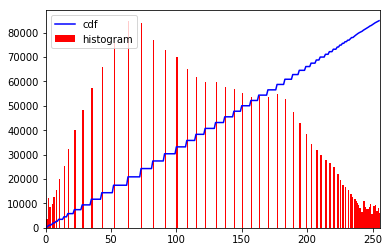

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg')

# 히스토그램 평활화 수행하기
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)
img_equalized = cv2.merge([equalized, equalized, equalized])

# 히스토그램 생성하기
hist, bins = np.histogram(img_equalized, 256, [0,256])

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# 히스토그램 시각화하기
plt.plot(cdf_normalized, color='b')
plt.hist(img_equalized.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')
plt.show()

# 이미지 창 띄우기
cv2.imshow('image', img_equalized)
cv2.waitKey()

cv2.destroyAllWindows()

#min-max streching과 다르게 많이 뭉쳐있으면 많이 퍼뜨리고, 조금 뭉쳐있으면 조금 퍼뜨리게 함
#min-max streching보다 효과가 좋음